# 2018 Labor Conditions Application Certification Analysis

The aim of this exploratory analysis is to find interesting patterns in the H-1B Labor Condition Application (LCA) process, specifically to learn about which applications get certified or denied and what employers can do to increase their chances of making it through the LCA application swiftly as to ensure timely filing for the H1B lottery (see Sonia's notebook). 

A case status is the status of the H-1B application after LCA processing. LCA either certifies or denies the application. Once applications are certified, they are sent to USCIS for H-1B adjudication and are subject to a cap of 85,000 visas a year. 

What can this data set tell us? ?

Question 1. What are the top 10 occupations for H-1B visas with certified status?

Question 2: Which company hires the most data scientists based on H-1B applications?

Qustion 3: What is the average salary for data scientists based on H-1B applications? And how does it compare to the average salary of all H-1B applicants?

What industries are in the top 5 percentile of H-1B applications?

What month is the tipping point for a high rate of denied applications?

Insights from the analysis:

Applications software developers, computer systems analysts, computer programmers, and other computer occupations topped the list of occupations that received H-1B certified status. Others occupations include management analysts, accountants and auditors, network administators, and financial analysts.
Microsoft hires the most data scientists (40), outpacing Facebook's distant second of 12 hires, and Uber's distant third of 6 hires.
H-1B certified Data Scientists earn an average of \$88,646 which is 17% more than the average of all H-1B visa applicants, \$75,735.
The state of Hawaii has the highest rate of H-1B visas denied (13%). This makes sense since Hawaii is mainly a tourist economy and most certified H-1B applications are from the high-tech/computer and Finance industries.
The state of Delaware has the highest rate of H-1B denied by population. Delaware's economy is primarily agriculture, manufacturing, and mining.
52 industries are in the top 5 percentile of applications. Holding top rank is Computer Programming Services.
H-1B visa applications are more likely to obtain certified status when applied early in the year. A significant number of applications are denied starting from October.
Key take-aways gained from this analysis are:

The competition for H-1B visas is very high as there are more applicants (93,533) than visas (80,000). The timeliness of the application submission is critical. To increase their chances of success, employers should submit their H-1B applications before October.
Good news for H-1B data scientists! They earn 17% more than the average H-1B applicants.
If you're a data scientist and a non-citizen of the US, apply first to Microsoft, Facebook and Uber.
About the data
This project uses three diffferent data sets:

The H-1B dataset used in this project was obtained from superdatascience.com. It is a modified version of the original dataset to simplify the analysis. The original data source can be downloaded from the United States Department of Labor website.
The dataset containing NAICS (North America Industry Classification System) codes can be downloaded from [data.gov] (https://catalog.data.gov/dataset/north-american-industry-classification-system-naics) website.
The populations of US states was obtained from this Wikipedia webpage and stored a csv file.

## Import Libraries

In [3]:
# Required packages for analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## Load Data

In [4]:
# Read in the H1B data set for 2018
LCA = pd.read_csv('2018.csv', encoding = 'latin1')

In [5]:
# Acertain the total number rows and columns
LCA.shape

(609036, 15)

## Explore Data

In [6]:
# Quick check to make sure dataframe was imported correctly
LCA.head()

,CASE_NUMBER,CASE_STATUS,CASE_SUBMITTED,DECISION_DATE,VISA_CLASS,EMPLOYMENT_START_DATE,EMPLOYMENT_END_DATE,EMPLOYER_NAME,EMPLOYER_STATE,EMPLOYER_POSTAL_CODE,JOB_TITLE,SOC_CODE,SOC_NAME,NAICS_CODE,PREVAILING_WAGE
0,I-200-18026-338377,CERTIFIED,1/29/2018,2/2/2018,H-1B,7/28/2018,7/27/2021,MICROSOFT CORPORATION,WA,98052,SOFTWARE ENGINEER,15-1132,"SOFTWARE DEVELOPERS, APPLICATIONS",51121.0,112549.0
1,I-200-17296-353451,CERTIFIED,10/23/2017,10/27/2017,H-1B,11/6/2017,11/6/2020,ERNST & YOUNG U.S. LLP,NJ,7094,TAX SENIOR,13-2011,ACCOUNTANTS AND AUDITORS,541211.0,79976.0
2,I-200-18242-524477,CERTIFIED,8/30/2018,9/6/2018,H-1B,9/10/2018,9/9/2021,LOGIXHUB LLC,TX,75062,DATABASE ADMINISTRATOR,15-1141,DATABASE ADMINISTRATORS,541511.0,77792.0
3,I-200-18070-575236,CERTIFIED,NaN,3/30/2018,H-1B,9/10/2018,9/9/2021,"HEXAWARE TECHNOLOGIES, INC.",NJ,8830,SOFTWARE ENGINEER,15-1132,"SOFTWARE DEVELOPERS, APPLICATIONS",541511.0,84406.0
4,I-200-18243-850522,CERTIFIED,8/31/2018,9/7/2018,H-1B,9/7/2018,9/6/2021,"ECLOUD LABS,INC.",NJ,8830,MICROSOFT DYNAMICS CRM APPLICATION DEVELOPER,15-1132,"SOFTWARE DEVELOPERS, APPLICATIONS",541511.0,87714.0


In [8]:
# Check the structure of the datafram
LCA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 609036 entries, 0 to 609035
Data columns (total 15 columns):
CASE_NUMBER              609036 non-null object
CASE_STATUS              609036 non-null object
CASE_SUBMITTED           609035 non-null object
DECISION_DATE            609036 non-null object
VISA_CLASS               609036 non-null object
EMPLOYMENT_START_DATE    609029 non-null object
EMPLOYMENT_END_DATE      609027 non-null object
EMPLOYER_NAME            609017 non-null object
EMPLOYER_STATE           608967 non-null object
EMPLOYER_POSTAL_CODE     609020 non-null object
JOB_TITLE                609031 non-null object
SOC_CODE                 609032 non-null object
SOC_NAME                 609032 non-null object
NAICS_CODE               609030 non-null float64
PREVAILING_WAGE          609035 non-null float64
dtypes: float64(2), object(13)
memory usage: 69.7+ MB


# What are the top 10 occupations for certified LCAs

In [11]:
#The number of cases in the visas dataset
LCA_cases = LCA.CASE_NUMBER.count()
print("Number of LCAs Filed in 2018:", LCA_cases)

Number of LCAs Filed in 2018: 609036


In [14]:
# Check how many case status categories are in the dataset
status_cat = LCA.CASE_STATUS.unique()
print("Case Status Categories: ", status_cat)

Case Status Categories:  ['CERTIFIED' 'DENIED' 'WITHDRAWN' 'CERTIFIED-WITHDRAWN']


In [19]:
# Subset just the certified and certified-withdrawn cases 
certified_LCA = LCA[(LCA.CASE_STATUS == 'CERTIFIED') | (LCA.CASE_STATUS == 'CERTIFIED-WITHDRAWN')]

# The number of cases in the certified LCA dataset
cert_LCA = certified_LCA.CASE_NUMBER.count()
print("Number of Certfied LCAs is: ", cert_LCA)

# The number of different occupations in the certified LCA dataset
distinct_occ = len(certified_LCA.SOC_CODE.unique())
print("Number of distinct occupations: ", distinct_occ)

Number of Certfied LCAs is:  582638
Number of distinct occupations:  595


In [26]:
#Combine the withdrawn cases statues
denied_LCA = LCA[(LCA.CASE_STATUS == 'DENIED') | (LCA.CASE_STATUS == 'WITHDRAWN')]

# The number of cases in the denied LCA dataset
denied_LCA = denied_LCA.CASE_NUMBER.count()
print("Number of Denied LCAs is: ", denied_LCA)

Number of Denied LCAs is:  26398


In [36]:
# Group, count, and sort to list Top 10 job titles of certified cases 
top_10_occupation = certified_visas.groupby('SOC_NAME').size().reset_index(name='COUNT').sort_values(by='COUNT', ascending=False)
top_10_occupation[:10]

,SOC_NAME,COUNT
724,"SOFTWARE DEVELOPERS, APPLICATIONS",177669
177,"COMPUTER OCCUPATIONS, ALL OTHER",56123
201,COMPUTER SYSTEMS ANALYSTS,55260
737,"SOFTWARE DEVELOPERS, SYSTEMS SOFTWARE",25243
185,COMPUTER PROGRAMMERS,24698
199,COMPUTER SYSTEMS ANALYST,13204
569,OPERATIONS RESEARCH ANALYSTS,12007
462,MANAGEMENT ANALYSTS,11432
499,MECHANICAL ENGINEERS,9265
238,DATABASE ADMINISTRATORS,9206


### Not shocking that the top 10 positions are all computer science related fields.  

## What companies are bringing in overseas data scientists? 

In [29]:
# Subset, group, size, and sort
ds_gb_company = LCA[LCA.JOB_TITLE == 'DATA SCIENTIST'].groupby('EMPLOYER_NAME').size().reset_index(name='COUNT')
ds_gb_company = ds_gb_company.sort_values(by='COUNT', ascending=False)
ds_gb_company.head()

# Top 10 companies requested data scientists
ds_gb_company[:10]

,EMPLOYER_NAME,COUNT
314,"FACEBOOK, INC.",132
529,MICROSOFT CORPORATION,80
404,IBM CORPORATION,68
861,"UBER TECHNOLOGIES, INC.",58
237,CYBER INFOTECH LLC,30
42,"AIRBNB, INC.",29
486,LINKEDIN CORPORATION,24
905,"WAL-MART ASSOCIATES, INC.",21
496,"LYFT, INC.",21
708,"SAP LABS, LLC",20


In [8]:
# Subset, group, size, and sort
ds1_gb_company = visas[visas.JOB_TITLE == 'SOFTWARE DEVELOPERS, APPLICATIONS'].groupby('EMPLOYER_NAME').size().reset_index(name='COUNT')
ds1_gb_company = ds1_gb_company.sort_values(by='COUNT', ascending=False)
ds1_gb_company.head()

# Top 10 companies requesTING SOFTWARE DEVEVLOPERS FOR APPLICATIONS
ds1_gb_company[:10]


,EMPLOYER_NAME,COUNT
40,INFOBIZ SYSTEMS LLC,181
22,ERNST & YOUNG U.S. LLP,106
50,MARVEL TECHNOLOGIES INC,70
65,SAVIN TECHNOLOGIES INC,55
86,VED SOFTWARE SERVICES INC,38
88,"VIZVA TECH SOLUTIONS, LLC",38
20,EMINENCE CONSULTING INC,36
72,TECHMAGIX INC,34
15,DAZZLON COMPUTER SERVICES INC,33
70,STRATEGIC STAFFING IT INC,32


## What is the average slaary for data scientists based on LCAs? How does it compare to the averagee salary of all filed LCAs? 

In [37]:
# Compute the mean salary for all applications
all_positions_salary = visas['PREVAILING_WAGE'].mean()
print('The average salary for all H-1B positions is ${:,.0f}'.format(all_positions_salary))

The average salary for all H-1B positions is $88,119


In [38]:
# Compute the mean salary for data scientist applications
ds_salary = visas['PREVAILING_WAGE'][visas.JOB_TITLE == 'DATA SCIENTIST'].mean()
print('The average salary for H-1B data scientists is ${:,.0f}'.format(ds_salary))

The average salary for H-1B data scientists is $92,497


In [40]:
# Compute the difference and percent difference in salary
salary_diff = ds_salary - all_positions_salary
salary_percent_diff = (salary_diff / all_positions_salary) *100
print('Data Scientists earn on average ${:,.0f} ({:.1f}%) more than the average of all H-1B visa applicants'.format(salary_diff, salary_percent_diff))

Data Scientists earn on average $4,379 (5.0%) more than the average of all H-1B visa applicants


In [32]:
# Compute the mean salary for SOFTWARE DEVELOPERs applications
ds_salary1 = visas['PREVAILING_WAGE'][visas.JOB_TITLE == 'SOFTWARE DEVELOPERS, APPLICATIONS'].mean()
print('The average salary for H-1B Applications Software Developers is ${:,.0f}'.format(ds_salary))

NameError: name 'ds_salary' is not defined

In [33]:
# Compute the difference and percent difference in salary
salary_diff1 = ds_salary1 - all_positions_salary
salary_percent_diff1 = (salary_diff1 / all_positions_salary) *100
print('Application Software Developers earn on average ${:,.0f} ({:.1f}%) more than the average of all H-1B visa applicants'.format(salary_diff, salary_percent_diff))

NameError: name 'all_positions_salary' is not defined

##### ^The above is super interesting. The PWDs for data scientists used to be 15% higher than all other LCAs (for 2007) with data science becoming more commonplace and nessecary in the everyday biz world the 

## Which state has the highest proportion of denied total H1-B visa applications? By State Population?

##### The visas dataset does not have data on state population. We will have to read in the state population dataset, create a dataframe to store the calculated fields for visas by state and merge it the visas dataset so that we can calculate the proportion of denied applications by state and by population.

In [10]:
# Get the number of denied cases
denied_apps = visas['CASE_STATUS'][visas.CASE_STATUS == 'DENIED'].count()
print("number of cases denied: ", denied_apps)

number of cases denied:  6981


In [12]:
# Read the states dataset
states = pd.read_csv('POP2018.csv')

# Check the number of states in the dataset
#states.shape    # verified dataset has 50 rows and 3 columns

print("dataset size: ",states.shape ) # verified dataset has 50 rows and 3 columns
states.head()

dataset size:  (50, 3)


,State Abbreviation,State,Population Estimate
0,AL,.Alabama,4887871
1,AK,.Alaska,737438
2,AZ,.Arizona,7171646
3,AR,.Arkansas,3013825
4,CA,.California,39557045


In [29]:
# Create a new dataframe with the states values
visas_by_state = pd.DataFrame(states['State Abbreviation'].unique())   
visas_by_state.columns = ['states']


In [31]:
# Create three more columns filled with zeros
visas_by_state['denied'] = np.zeros(len(visas_by_state))
visas_by_state['applicants'] = np.zeros(len(visas_by_state))
visas_by_state['population'] = np.zeros(len(visas_by_state))

# Set the index to use the states as row labels
visas_by_states.set_index(visas_by_state.state, inplace=True, drop=True)

# Show the new dataframe
#visas_by_state.head()



NameError: name 'visas_by_states' is not defined

In [24]:
# Fill the new dataframe with the calculated values that we need:
for st in visas_by_state.state:
    
    # fill the number of denied visas by state
    visas_by_state.loc[st, 'denied'] = len(visas[(visas.CASE_STATUS == 'DENIED') & (visas.EMPLOYER_STATE == st)])
    
    # fill the number of applicants by state
    visas_by_state.loc[st, 'applicants'] = len(visas[visas.EMPLOYER_STATE == st])
    
    # fill the population by state
    visas_by_state.loc[st, 'population'] = states[states['State Abbreviation'] == st]['Population Estimate'].sum()


# Create two additional columns to represent the proportion of denied by applications and by population
visas_by_state['denied_by_application'] = np.divide(visas_by_state.denied, visas_by_state.applicants)
visas_by_state['denied_by_population'] = np.divide(visas_by_state.denied, visas_by_state.population)

visas_by_state.head()

,state,denied,applicants,population,denied_by_application,denied_by_population
state,,,,,,
AL,AL,26.0,1174.0,4887871.0,0.022147,0.000005
AK,AK,1.0,64.0,737438.0,0.015625,0.000001
AZ,AZ,42.0,4417.0,7171646.0,0.009509,0.000006
AR,AR,14.0,2870.0,3013825.0,0.004878,0.000005
CA,CA,1421.0,106166.0,39557045.0,0.013385,0.000036


In [28]:
# Merge the datasets
visas_by_state = pd.merge(visas_by_state, states, left_on='state', right_on='State Abbreviation')

# Explore the merged dataframe
visas_by_state.head()

ValueError: 'state' is both an index level and a column label, which is ambiguous.

## What month is the tipping point for a high rate of denials? 

In [41]:

# Filter just the dates of denied visas
denied_visas = visas[['CASE_NUMBER','CASE_SUBMITTED', 'DECISION_DATE']][visas.CASE_STATUS == 'DENIED']

In [42]:
# Extract the month from both dates
denied_visas['Month_submitted'] =  pd.DatetimeIndex( denied_visas.CASE_SUBMITTED).month
denied_visas['Month_decision'] =  pd.DatetimeIndex( denied_visas.DECISION_DATE).month

In [ ]:
# Explore the denied_visas dataset
denied_visas.head(10)

<function matplotlib.pyplot.show(*args, **kw)>

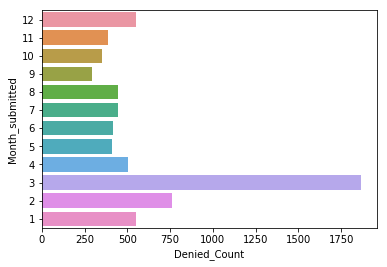

In [45]:
# Group by month of submitted dates
denied_visas_gr_by_month_sub = denied_visas.groupby('Month_submitted').size().reset_index(name='Denied_Count')
denied_visas_gr_by_month_sub = denied_visas_gr_by_month_sub.sort_values(by='Month_submitted', ascending=False)  

# Plot visas denied grouped by month submitted dates
sns.barplot(x='Denied_Count', y='Month_submitted', data=denied_visas_gr_by_month_sub, 
            order=denied_visas_gr_by_month_sub.Month_submitted, orient='h')
plt.show

### This result is also intuitive becuase one must have a certified LCA to apply for an H1B. Lawyers who are prepared would have filed these LCAs ahead of time so they can be certified and returned before the H1B cap opens (your appliction must arrive within the 2 or 3 day window before the cap is full to even have a chance of getting approved). If your lawyer is filing your LCA is March he is cutting it WAY to close and his poor, overworked paralegals are making mistakes are higher rates which could be a factor in the high number of denials. 

## Conclusion

#####  With a thriving economy in the US, many companies are petitioning H-1B working visas for their foreign national workers. This exploratory analysis uncovered insightful facts and trends about the H-1B visa applications: 

The majority of the H-1B certified applications went to applicants working in the the High-Tech/Computer industry.
By far, Microsoft hires the most data scientists (40) whic is 3X more hires than Facebook (runner-up).
Data scientists earn an average of \$88,646 which is 17% more than the average of all applicants.
The state of Hawaii has highest rate of denied H-1B applications (13 percent) while the state of Delaware has the highest rate of H-1B denied by population.
52 industries are in the top 5 percentile of applications. Holding top rank is Computer Programming Services with 31,941 H-1B visa applications.
The month of H1-B application submission plays a role on how likely the application will be denied. Applications are more likey to get certified when submitted early in the year. They are likely to be denied starting from October.
The key insight gained from this analysis is the timeliness of application submission. This piece of information is very useful to employers. To increase their chances of success, employers should submit their H-1B visa applications as early as possible in the year. A denied application means that the foreign national workers cannot start working for the company. This would have a huge impact on the business bottomline.